In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np

/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
u = mda.Universe("top.pdb", "PEG400_1.0.dcd")

/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [5]:
proteins = u.select_atoms("protein")
num_proteins = len(proteins.segments)
print("Number of proteins moleules:", num_proteins)

peg400 = u.select_atoms("resname PEG")
num_peg = len(peg400.segments)
print("Number of PEG400 molecules:", num_peg)

Number of proteins moleules: 200
Number of PEG400 molecules: 1626


In [15]:
num_bins = 200
z_min = 0
z_max = u.dimensions[2]
bin_edges = np.linspace(z_min, z_max, num_bins+1)
bin_volume = np.prod(u.dimensions[:3])*0.001
bin_centers = 0.5 * (bin_edges[1:]+bin_edges[:-1])*0.1

In [16]:
protein_density_collector = np.zeros(num_bins)
peg_density_collector = np.zeros(num_bins)

for ts in u.trajectory:
    protein_zcoordinates = proteins.positions[:,2]
    peg_zcoordinates = peg400.positions[:,2]

    protein_hist, _ = np.histogram(protein_zcoordinates, bins=bin_edges)
    peg_hist, _ = np.histogram(peg_zcoordinates, bins=bin_edges)

    protein_density_collector += protein_hist
    peg_density_collector += peg_hist

num_frames = u.trajectory.n_frames

avg_protein_density = protein_density_collector/num_frames
protein_num_density = avg_protein_density/bin_volume

avg_peg_density = peg_density_collector/num_frames
peg_num_density = avg_peg_density/bin_volume

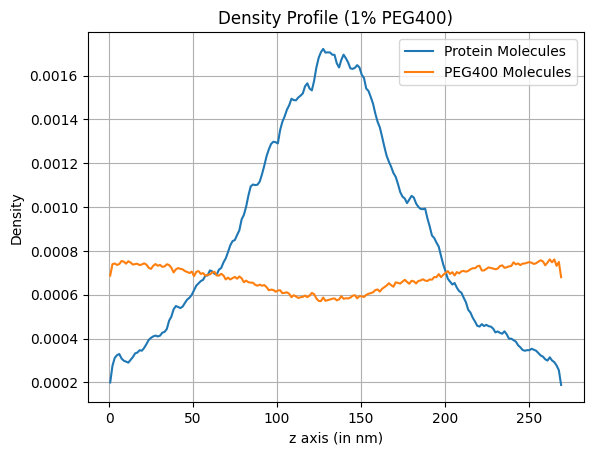

In [17]:
plt.plot(bin_centers, protein_num_density, label='Protein Molecules')
plt.plot(bin_centers, peg_num_density, label='PEG400 Molecules')
plt.xlabel(r'z axis (in nm)')
plt.ylabel("Density")
plt.title("Density Profile (1% PEG400)")
plt.legend()
plt.grid(True)
plt.show()